## Case Study: Boston Housing Price Prediction by Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.


# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Contents:

- <a href = #link1> 1.1 Import the libraries  </a>
- <a href = #link2> 1.2 Load dataset and check shape and variables  </a>
- <a href = #link3> 1.3 Check Statistical summary for all the datasets  </a>
- <a href = #link4> 1.4 EDA  </a>
- <a href = #link5> 1.5 Split the data  </a>
- <a href = #link6> 1.6 Modelling </a>
- <a href = #link7> 1.7 Conclusion   </a>

<a id = "link1"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.1 Import the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


<a id = "link2"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.2 Load dataset and check shape and variables

In [2]:
df=pd.read_csv('Boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


##### Check data shape

In [4]:
df.shape

(506, 13)

##### Check data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


<a id = "link3"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.3 Check Statistical summary for all the datasets  </a>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### Observation
* The avarge number of room per dwelling is 6.
* There is one teacher per 19 student.
* 11% of total population falls in lower status.
* Median value of owner-occupied homes in 1000 dollars is 21.

<a id = "link4"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.4 EDA  </a>

### Univariate and Bivariate Analysis


In [7]:
def histogram_boxplot(feature,figsize=(12,7),bins=None):
    f2,(ax_box2,ax_hist2)=plt.subplots(nrows=2,sharex=True,gridspec_kw={"height_ratios":(0.25,0.75)},figsize=figsize)
    sns.boxplot(feature,ax=ax_box2,showmeans=True,color='violet')
    sns.distplot(feature,kde=False,ax=ax_hist2,bins=bins,palette='winter')if bins else sns.distplot(feature,kde=False,ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature),color='green',linestyle='--')
    ax_hist2.axvline(np.median(feature),color='black',linestyle='-')
    print("Mean:",np.mean(feature),"\nMedian:",np.median(feature))
                                       

**Observation on RM: average number of rooms per dwelling**

Mean: 6.284634387351788 
Median: 6.208499999999999


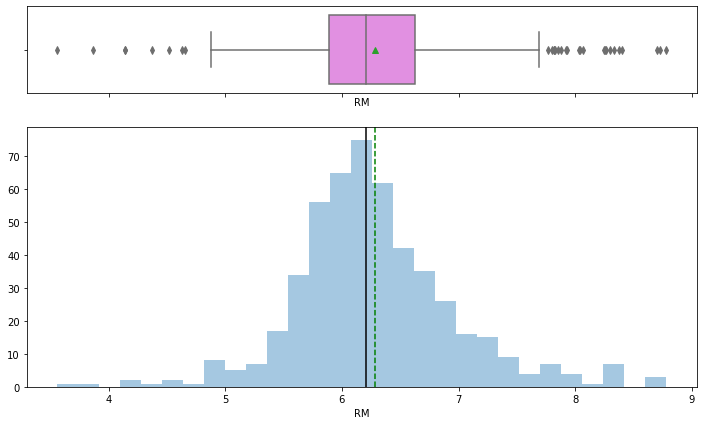

In [8]:
histogram_boxplot(df['RM'])

* Menas and median are very close to each other suggesting distribtion is close to normal.
* There are outliers in the data.
* The total number of room on an average is 6 per house in the neighborhood.

**Observation on age**

Mean: 68.57490118577078 
Median: 77.5


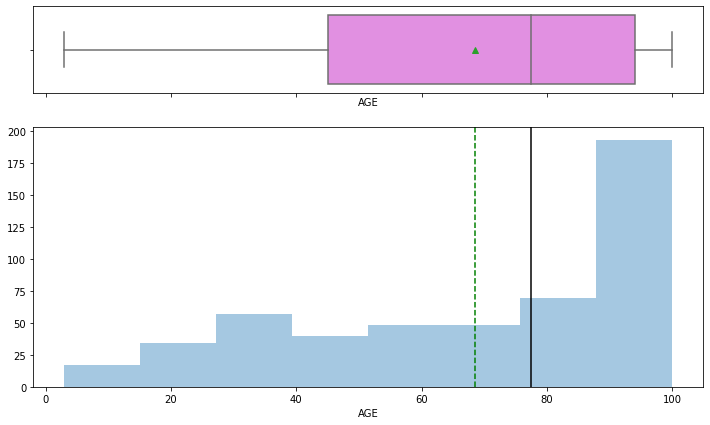

In [9]:
histogram_boxplot(df['AGE'])

* Age is left skwed.

**Observation on CRIM**

Mean: 3.6135235573122535 
Median: 0.25651


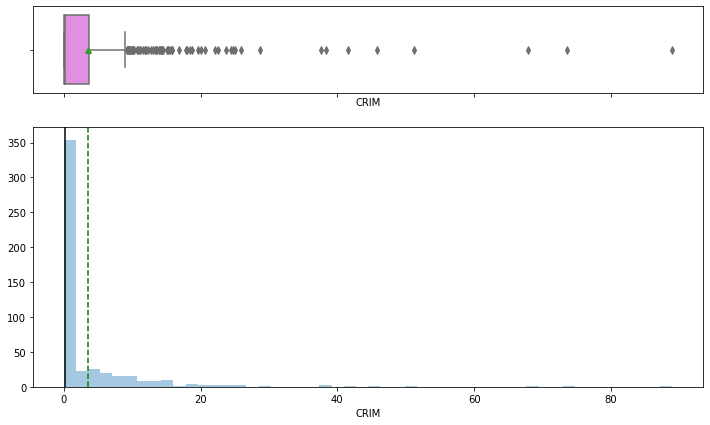

In [10]:
histogram_boxplot(df['CRIM'])

* Per capita crime rate is concentrated toward the low end.
* There are many outliers towars the higher end.

**Observation on PTRATIO: pupil-teacher ratio by town**

Mean: 18.455533596837967 
Median: 19.05


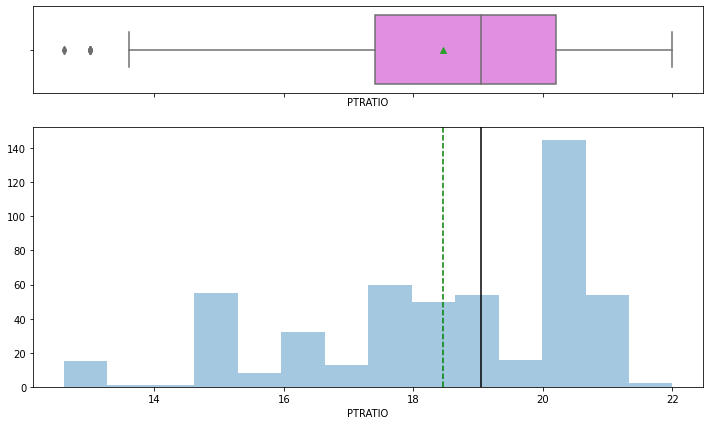

In [11]:
histogram_boxplot(df['PTRATIO'])

* On an avarge there is one teacher per 18 student.
* PTRATIO is left skewed.
* There are two outlier shwoing 1 teacher for 13 student.

**Observation on MEDV: Median value of owner-occupied homes in 1000 dollars**

Mean: 22.532806324110698 
Median: 21.2


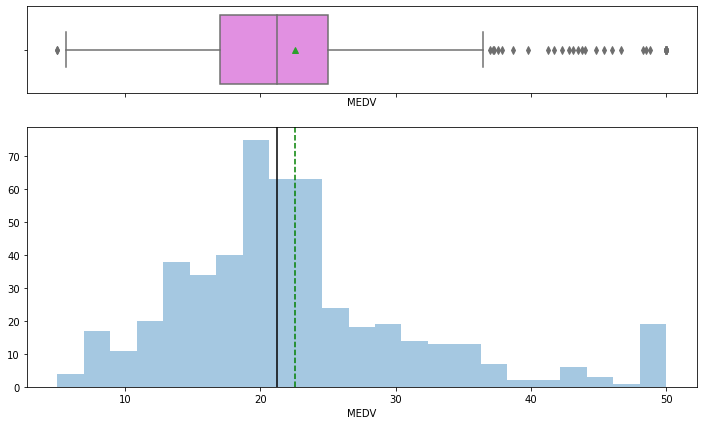

In [12]:
histogram_boxplot(df['MEDV'])

* The MEDV is normally distributed with few outliers.

###  Bivariate Analysis

#### Price Vs Room

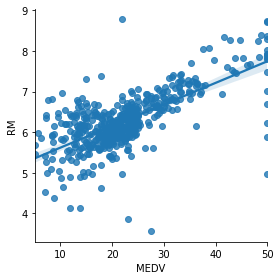

In [19]:
sns.lmplot(x="MEDV",y="RM",height=4,aspect=1,data=df)

#### Price Vs Room ,LSTAT and PTRATIO

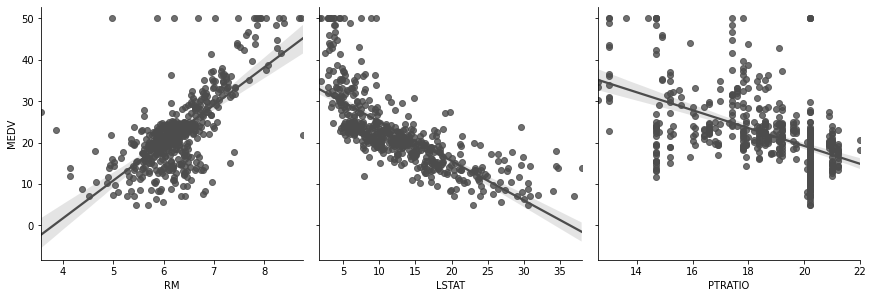

In [23]:
g = sns.PairGrid(df, y_vars=["MEDV"], x_vars=["RM", "LSTAT","PTRATIO"], height=4)
g.map(sns.regplot,color=".3")

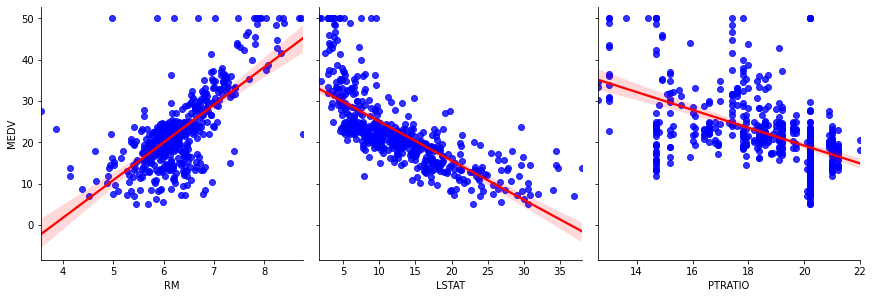

In [36]:
g = sns.PairGrid(df, y_vars=["MEDV"], x_vars=["RM", "LSTAT","PTRATIO"], height=4)
g.map(sns.regplot,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

### Observation:
* Price is increasing as number of room increses.
* Area with lower class citizen have negtive impact on price.
* Area with more PTRATIO again have inverse relationship with the price.

#### Correlation and heat Map

In [39]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


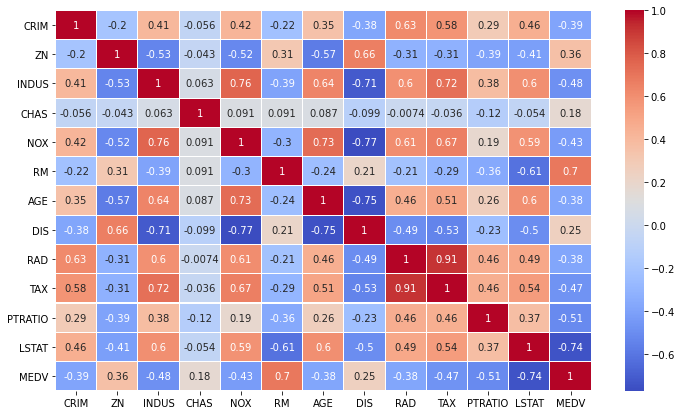

In [40]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),linewidths=0.05,annot=True,cmap='coolwarm')
plt.show()

#### Observation:
* Number of room (RM) is positively correlated with Price (MEDV)
* LSTAT and MEDV is negatively correlated.
* PTRATION and MEDV is also negatively correlated.



### Choose Data for Model building

In [27]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [28]:
df1=df[['RM','PTRATIO', 'LSTAT', 'MEDV']]
df1.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


<a id = "link5"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.5 Split the data

In [42]:
Y = df1['MEDV']
X = df1.drop(columns = {'MEDV'})

In [43]:
# split the data,train:tets=70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

<a id = "link6"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.6 Modelling

In [170]:
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  
print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred_train = linearregression.predict(X_train)
pred = linearregression.predict(X_test)                      

Intercept of the linear equation: 25.373484464182276

COefficients of the equation are: [ 3.52839125 -0.93396631 -0.60681801]


In [89]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,linearregression.coef_[idx]))

The coefficient for RM is 3.5283912508549005
The coefficient for PTRATIO is -0.933966309914697
The coefficient for LSTAT is -0.6068180145836557


## Model performance

**Get the score on training set**

In [56]:
#get the R-square score the fitted train data

print(' R^2 on Train set', linearregression.score(X_train,y_train))

 R^2 on Train set 0.650740670299456


In [171]:
#get the R-square score the fitted train data

print(' R^2 on Train set', r2_score(y_train,pred_train))

 R^2 on Train set 0.650740670299456


**Get the score on test set**

In [59]:
#get the R-square score the fitted test data

print(' R^2 on Test set',r2_score(y_test,pred))

 R^2 on Test set 0.7228623473287099


In [68]:
print(' R^2 on Test set',linearregression.score(X_test,y_test))

 R^2 on Test set 0.7228623473287099


In [172]:
# RMSE on train and test data
print('rmse on train data :', mean_squared_error(y_train, pred_train)**0.5)
print('rmse on test data :', mean_squared_error(y_test, pred)**0.5)

rmse on train data : 5.325038761272029
rmse on test data : 5.039931488838319


### Predcited vs original Price visualization

In [165]:
df_pred=pd.DataFrame({'Predicted_Price':pred})
df_lable=y_test
df_lable_pred=pd.DataFrame({'Original_Price':y_test,
                           'Predicted_Price':pred})



In [166]:
df_lable_pred.shape

(152, 2)

In [167]:
df_lable_pred.reset_index(drop=True)

,Original_Price,Predicted_Price
0,28.2,27.785116
1,23.9,28.204832
2,16.6,18.523508
3,22.0,23.546179
4,20.8,19.243123
...,...,...
147,19.1,14.750938
148,28.4,27.902343
149,20.5,17.687221
150,33.8,32.827540


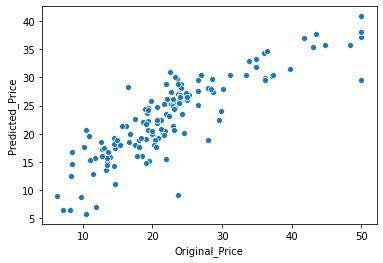

In [168]:
sns.scatterplot(x='Original_Price',y='Predicted_Price',data=df_lable_pred)

<a id = "link7"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.7 Conclusion

#### Conclusion
* R2_score on train data is 0.65 while on test data is 0.72 which shows that the model is generalized.
* R2_score is 0.72, that explains 72% of total variation in the dataset. So, overall, the model is OK.
* Scatter plot between predicted price and original price is good for qualitative analysis to catch the misclassification against the background trend.
